data preprocessing pipeline

# **1. Import thư viện**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **2. Đọc và kiểm tra dữ liệu tổng quan**

In [ ]:
# kết nối với Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đường dẫn tới dataset
data_path = '/content/drive/MyDrive/IE313_Project/1.Dataset/original_data/ECommerce_Dataset.csv'

In [ ]:
# đọc dữ liệu
df = pd.read_csv(data_path)

In [ ]:
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (5630, 20)


In [ ]:
# xem các dòng dữ liệu đầu
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
# Thông tin tổng quan ban đầu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# xem thống kê mô tả ban đầu
df.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000


In [ ]:
# Kiểm tra số giá trị null
print(df.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


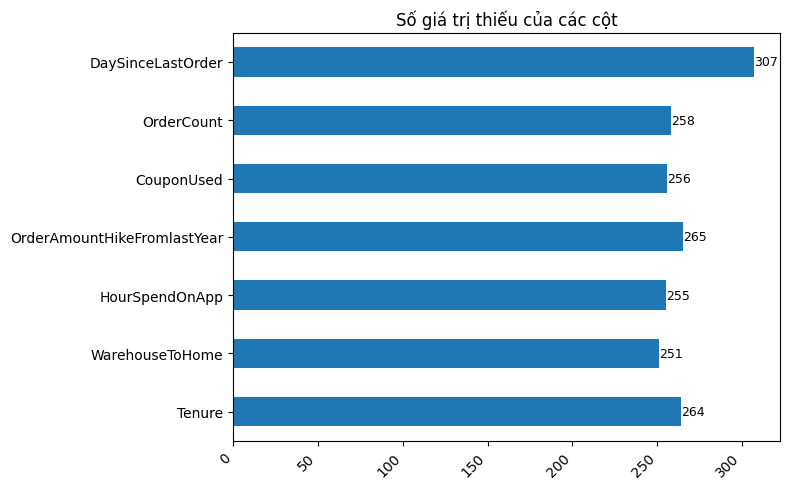

In [ ]:
# Đếm số giá trị thiếu theo cột
missing_count = df.isnull().sum()
missing_count = missing_count[missing_count > 0]

plt.figure(figsize=(8, 5))
ax = missing_count.plot(kind='barh')

for p in ax.patches:
    ax.text(p.get_width(), p.get_y()+p.get_height()/2,
            int(p.get_width()), va='center', fontsize=9)

plt.title('Số giá trị thiếu của các cột')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Xem số lượng giá trị duy nhất của mỗi cột
print(df.nunique())

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64


**Phân tích kết quả:**
* Gồm **5.630 bản ghi** (mỗi bản ghi tương ứng với một khách hàng) và **20 thuộc tính** mô tả thông tin liên quan đến hành vi, nhân khẩu học và mức độ tương tác của khách hàng trong nền tảng thương mại điện tử.
* Biến định tính (Gender, PreferredPaymentMode, CityTier...) và định lượng (Tenure, OrderCount, CashbackAmount...).
* Biến mục tiêu:
  * 'Churn' (1 = đã rời bỏ, 0 = còn hoạt động).
  * giá trị trung bình ~0.168 → khoảng **16.8% khách hàng rời bỏ**, cho thấy dữ liệu bị **mất cân bằng nhẹ** giữa hai lớp (Churn vs Non-Churn).
* Một số biến định lượng có giá trị thiếu như: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

# **3. Xử lý dữ liệu không nhất quán**

In [ ]:
# bỏ cột CustomerID do không mang thông tin hữu ích
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
# Xem các giá trị duy nhất của các cột phân loại
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].unique())


PreferredLoginDevice:
['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender:
['Female' 'Male']

PreferedOrderCat:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus:
['Single' 'Divorced' 'Married']


- Cột *PreferredLoginDevice*, *PreferedOrderCat* có các giá trị không nhất quán: 'Mobile Phone', 'Mobile' và 'Phone' thực chất cùng nghĩa, gộp thành 'Mobile Phone'
- Cột *PreferredPaymentMode* có nhiều cách viết khác nhau: 'CC' = 'Credit Card', 'COD' = 'Cash on Delivery'

In [ ]:
# Chuẩn hóa giá trị
df['PreferredLoginDevice'].replace({
    'Phone': 'Mobile Phone'}, inplace = True)

df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery',
    'E wallet': 'E-Wallet'}, inplace = True)

df['PreferedOrderCat'].replace({
    'Mobile': 'Mobile Phone'}, inplace = True)

In [ ]:
# Xem lại các giá trị duy nhất sau khi chuẩn hóa
print('PreferredLoginDevice:\n', df['PreferredLoginDevice'].unique())
print('\nPreferredPaymentMode:\n', df['PreferredPaymentMode'].unique())
print('\nPreferedOrderCat:\n', df['PreferedOrderCat'].unique())

PreferredLoginDevice:
 ['Mobile Phone' 'Computer']

PreferredPaymentMode:
 ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E-Wallet']

PreferedOrderCat:
 ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']


# **4. Xử lý dữ liệu thiếu và ngoại lai**

#### Cột 'Tenure'

* **Tenure**: Số tháng khách hàng đã gắn bó với công ty.

In [ ]:
df['Tenure'].isnull().sum()

np.int64(264)

In [ ]:
df['Tenure'].value_counts()

,count
Tenure,
1.0,690
0.0,508
8.0,263
9.0,247
7.0,221
10.0,213
5.0,204
4.0,203
3.0,195


* Đa số khách hàng có Tenure thấp (0-1 tháng).
* Việc điền giá trị thiếu bằng 0 hoặc 1 sẽ dựa trên mức độ hoạt động của khách hàng:
  * Nếu chưa có hoạt động (OrderCount, HourSpendOnApp = 0 hoặc NaN) → điền bằng 0, phản ánh khách hàng vừa đăng ký, chưa hoạt động.
  * Nếu đã có hoạt động, nhưng thông tin Tenure bị thiếu → điền bằng 1, phản ánh khách hàng mới nhưng đã hoạt động ít nhất một thời gian.

In [ ]:
# Nếu không có hoạt động -> điền 0
df.loc[(df['Tenure'].isna()) & (
        (df['OrderCount'] == 0 | df['OrderCount'].isna()) &
        (df['HourSpendOnApp'] == 0 | df['HourSpendOnApp'].isna())),
    'Tenure'] = 0

# Nếu có hoạt động -> điền 1
df['Tenure'].fillna(1, inplace=True)


In [ ]:
# Dùng thống kê IQR để phát hiện ngoại lai
Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Tenure'] < lower_bound) | (df['Tenure'] > upper_bound)]
print("Số lượng ngoại lai:", len(outliers))


Số lượng ngoại lai: 4


In [ ]:
# Thay thế ngoại lai bằng giá trị giới hạn (capping/winsorizing)
df['Tenure'] = np.where(df['Tenure'] < lower_bound, lower_bound,
                np.where(df['Tenure'] > upper_bound, upper_bound, df['Tenure']))

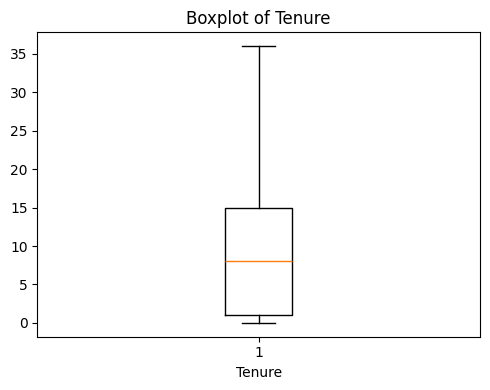

In [ ]:
# kiểm tra lại bằng biểu đồ hộp
plt.figure(figsize=(5, 4))
plt.boxplot(df['Tenure'])
plt.xlabel('Tenure')
plt.title('Boxplot of Tenure')
plt.tight_layout()
plt.show()

In [ ]:
df['Tenure'].isnull().sum()

np.int64(0)

In [ ]:
# chuyển sang kiểu số nguyên
df['Tenure'] = df['Tenure'].astype(int)
df['Tenure'].dtypes

dtype('int64')

#### Cột 'WarehouseToHome'

- **WarehouseToHome**: Khoảng cách (km) giữa kho hàng và nhà khách hàng. Có thể thiếu do khách hàng chưa cập nhật địa chỉ.

In [ ]:
df['WarehouseToHome'].isnull().sum()

np.int64(251)

In [ ]:
print(df['WarehouseToHome'].value_counts())

WarehouseToHome
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
26.0      89
18.0      89
25.0      86
24.0      85
21.0      85
29.0      81
27.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: count, dtype: int64


* Phân bố giá trị chủ yếu quanh 6–17 km, trung vị (median) xấp xỉ 13-14 km.
* Thay các giá trị ngoại lại về các ngưỡng trên, dưới tương ứng
* Điền giá trị thiếu bằng median


In [ ]:
# Điền NaN bằng median
median_wh = df['WarehouseToHome'].median()
df['WarehouseToHome'].fillna(median_wh, inplace=True)
print(median_wh)

14.0


In [ ]:
# Dùng thống kê IQR để phát hiện ngoại lai
Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['WarehouseToHome'] < lower_bound) | (df['WarehouseToHome'] > upper_bound)]
print("Số lượng ngoại lai:", len(outliers))


Số lượng ngoại lai: 2


In [ ]:
# Thay thế ngoại lai bằng giá trị giới hạn (capping/winsorizing)
df['WarehouseToHome'] = np.where(df['WarehouseToHome'] < lower_bound, lower_bound,
                np.where(df['WarehouseToHome'] > upper_bound, upper_bound, df['WarehouseToHome']))

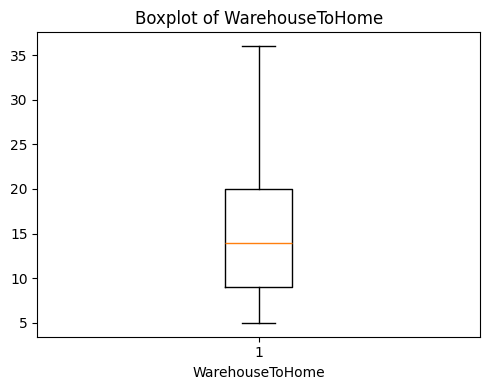

In [ ]:
# kiểm tra lại bằng biểu đồ hộp
plt.figure(figsize=(5, 4))
plt.boxplot(df['WarehouseToHome'])
plt.xlabel('WarehouseToHome')
plt.title('Boxplot of WarehouseToHome')
plt.tight_layout()
plt.show()

In [ ]:
df['WarehouseToHome'].isnull().sum()

np.int64(0)

In [ ]:
df['WarehouseToHome'] = df['WarehouseToHome'].astype(int)
df['WarehouseToHome'].dtypes

dtype('int64')

#### Cột 'HourSpendOnApp'

- **HourSpendOnApp**: Số giờ khách hàng sử dụng ứng dụng / website. Thiếu có thể do khách hàng chưa có lịch sử truy cập.

In [ ]:
df['HourSpendOnApp'].isnull().sum()

np.int64(255)

In [ ]:
df['HourSpendOnApp'].value_counts()

,count
HourSpendOnApp,
3.0,2687
2.0,1471
4.0,1176
1.0,35
0.0,3
5.0,3


- Phần lớn khách hàng dùng app 2–4 giờ.
- Điền giá trị thiếu bằng median.

In [ ]:
median_hour = df['HourSpendOnApp'].median()
df['HourSpendOnApp'].fillna(median_hour, inplace=True)
print(median_hour)

3.0


In [ ]:
# # Dùng thống kê IQR để phát hiện ngoại lai
# Q1 = df['HourSpendOnApp'].quantile(0.25)
# Q3 = df['HourSpendOnApp'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['HourSpendOnApp'] < lower_bound) | (df['HourSpendOnApp'] > upper_bound)]
# print("Số lượng ngoại lai:", len(outliers))


In [ ]:
# print(lower_bound)
# print(upper_bound)

In [ ]:
# lower_bound = 1
# upper_bound = 4

In [ ]:
# # Thay thế ngoại lai bằng giá trị giới hạn (capping/winsorizing)
# df['HourSpendOnApp'] = np.where(df['HourSpendOnApp'] < lower_bound, lower_bound,
#                 np.where(df['HourSpendOnApp'] > upper_bound, upper_bound, df['HourSpendOnApp']))

In [ ]:
# # kiểm tra lại bằng biểu đồ hộp
# plt.figure(figsize=(5, 4))
# plt.boxplot(df['HourSpendOnApp'])
# plt.xlabel('HourSpendOnApp')
# plt.title('Boxplot of HourSpendOnApp')
# plt.tight_layout()
# plt.show()

In [ ]:
df['HourSpendOnApp'].isnull().sum()

np.int64(0)

In [ ]:
df['HourSpendOnApp'] = df['HourSpendOnApp'].astype(int)
df['HourSpendOnApp'].dtypes

dtype('int64')

In [ ]:
df['HourSpendOnApp'].value_counts()

,count
HourSpendOnApp,
3,2942
2,1471
4,1176
1,35
0,3
5,3


#### Cột 'OrderAmountHikeFromlastYear'

- **OrderAmountHikeFromlastYear**: % tăng số tiền đặt hàng so với năm trước.
- Điền dữ liệu thiếu bằng median

In [ ]:
df['OrderAmountHikeFromlastYear'].isnull().sum()

np.int64(265)

In [ ]:
print(df['OrderAmountHikeFromlastYear'].value_counts())

OrderAmountHikeFromlastYear
14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: count, dtype: int64


In [ ]:
median_order = df['OrderAmountHikeFromlastYear'].median()
df['OrderAmountHikeFromlastYear'].fillna(median_order, inplace=True)
print(median_order)

15.0


In [ ]:
df['OrderAmountHikeFromlastYear'].isnull().sum()

np.int64(0)

In [ ]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].astype(int)
df['OrderAmountHikeFromlastYear'].dtypes

dtype('int64')

In [ ]:
df['OrderAmountHikeFromlastYear'].value_counts().head()

,count
OrderAmountHikeFromlastYear,
15,807
14,750
13,741
12,728
11,391


#### Cột 'CouponUse', 'OrderCount'

- **CouponUsed**: Số lượng coupon đã dùng trong tháng trước. Thiếu do không có giao dịch hoặc dữ liệu chưa ghi nhận.
- **OrderCount**: Số lượng đơn hàng trong tháng trước. Thiếu có thể do khách hàng chưa đặt đơn nào.


In [ ]:
df[['CouponUsed', 'OrderCount']].isnull().sum()

,0
CouponUsed,256
OrderCount,258


In [ ]:
print(df['CouponUsed'].value_counts())
print()
print(df['OrderCount'].value_counts())

CouponUsed
1.0     2105
2.0     1283
0.0     1030
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: count, dtype: int64

OrderCount
2.0     2025
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: count, dtype: int64




> Kiểm tra mối liên hệ giữa 2 cột 'CouponUsed', 'OrderCount'



In [ ]:
# Bỏ qua các dòng có NaN trong 2 cột này
df_check = df[['CouponUsed', 'OrderCount']].dropna()

# Kiểm tra điều kiện
violations = df_check[df_check['CouponUsed'] > df_check['OrderCount']]

print("Số dòng vi phạm điều kiện CouponUsed <= OrderCount:", len(violations))

if len(violations) > 0:
    display(violations[['CouponUsed', 'OrderCount']])
else:
    print("Tất cả các giá trị hợp lệ đều thỏa điều kiện CouponUsed <= OrderCount.")


Số dòng vi phạm điều kiện CouponUsed <= OrderCount: 0
Tất cả các giá trị hợp lệ đều thỏa điều kiện CouponUsed <= OrderCount.


In [ ]:
# Tạo cột chênh lệch
df_check['diff'] = df['OrderCount'] - df['CouponUsed']

# Tần số từng mức chênh lệch
print(df_check['diff'].value_counts())

diff
0.0     2111
1.0     2024
2.0      343
3.0      168
4.0      134
5.0      106
6.0       60
7.0       60
8.0       36
9.0       24
11.0      16
10.0      15
12.0       8
13.0       7
14.0       4
Name: count, dtype: int64


**Nhận xét:**
- Hầu hết độ chênh lệch giữa CouponUsed và OrderCount là 0 hoặc 1.
- Nên giữ quan hệ logic: **CouponUsed <= OrderCount** khi điền giá trị thiếu.
- Quy tắc điền:
  - Nếu cả hai đều NaN → điền 0 (khách hàng không hoạt động trong tháng).
  - Nếu một cột NaN → điền dựa vào giá trị của cột còn lại.

In [ ]:
# Cả hai đều NaN → điền 0
df.loc[df['OrderCount'].isna() & df['CouponUsed'].isna(), ['OrderCount', 'CouponUsed']] = 0

# Điền NaN còn lại dựa vào cột còn lại
df.loc[df['CouponUsed'].isna(), 'CouponUsed'] = df.loc[df['CouponUsed'].isna(), 'OrderCount']
df.loc[df['OrderCount'].isna(), 'OrderCount'] = df.loc[df['OrderCount'].isna(), 'CouponUsed']


In [ ]:
df[['CouponUsed', 'OrderCount']].isnull().sum()

,0
CouponUsed,0
OrderCount,0


In [ ]:
df['CouponUsed'] = df['CouponUsed'].astype(int)
df['OrderCount'] = df['OrderCount'].astype(int)
df[['CouponUsed', 'OrderCount']].dtypes

,0
CouponUsed,int64
OrderCount,int64


In [ ]:
# Kiểm tra lại quy tắc logic
assert (df['CouponUsed'] <= df['OrderCount']).all(), "Có giá trị CouponUsed > OrderCount!"

#### Cột 'DaySinceLastOrder'

- **DaySinceLastOrder**: Số ngày kể từ lần đặt hàng gần nhất. Thiếu có thể do khách hàng chưa từng đặt hàng.

In [ ]:
df['DaySinceLastOrder'].isnull().sum()

np.int64(307)

In [ ]:
print(df['DaySinceLastOrder'].value_counts())

DaySinceLastOrder
3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64


- Dữ liệu cột 'OrderCount' (Tổng số đơn đã đặt hàng tháng trước) nằm trong khoảng từ 1 đến 16 đơn.
- Tức là toàn bộ khách hàng đều có đơn vào tháng trước.
- Do đó:
  - DaySinceLastOrder phải có dữ liệu <30
  - Thay các giá trị >=30 bằng nan
  - Điền giá trị thiếu bằng median

In [ ]:
median_day = df['DaySinceLastOrder'].median()
print(median_day)

3.0


In [ ]:
df.loc[df['DaySinceLastOrder'] >= 30, 'DaySinceLastOrder'] = np.nan
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
df['DaySinceLastOrder'].isnull().sum()

np.int64(0)

In [ ]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].astype(int)
df['DaySinceLastOrder'].dtypes

dtype('int64')

In [ ]:
print(df['DaySinceLastOrder'].value_counts())

DaySinceLastOrder
3     1210
2      792
1      614
8      538
0      496
7      447
4      431
9      299
5      228
10     157
6      113
11      91
12      69
13      51
14      35
15      19
17      17
16      13
18      10
Name: count, dtype: int64


#### Các cột còn lại

In [ ]:
cols = ['CityTier','NumberOfDeviceRegistered','SatisfactionScore',
    'NumberOfAddress','Complain','CashbackAmount']

In [ ]:
# Kiểm tra kiểu dữ liệu
print(df[cols].dtypes)

CityTier                    int64
NumberOfDeviceRegistered    int64
SatisfactionScore           int64
NumberOfAddress             int64
Complain                    int64
CashbackAmount              int64
dtype: object


In [ ]:
# Kiểm tra số lượng giá trị thiếu
print(df[cols].isnull().sum())

CityTier                    0
NumberOfDeviceRegistered    0
SatisfactionScore           0
NumberOfAddress             0
Complain                    0
CashbackAmount              0
dtype: int64


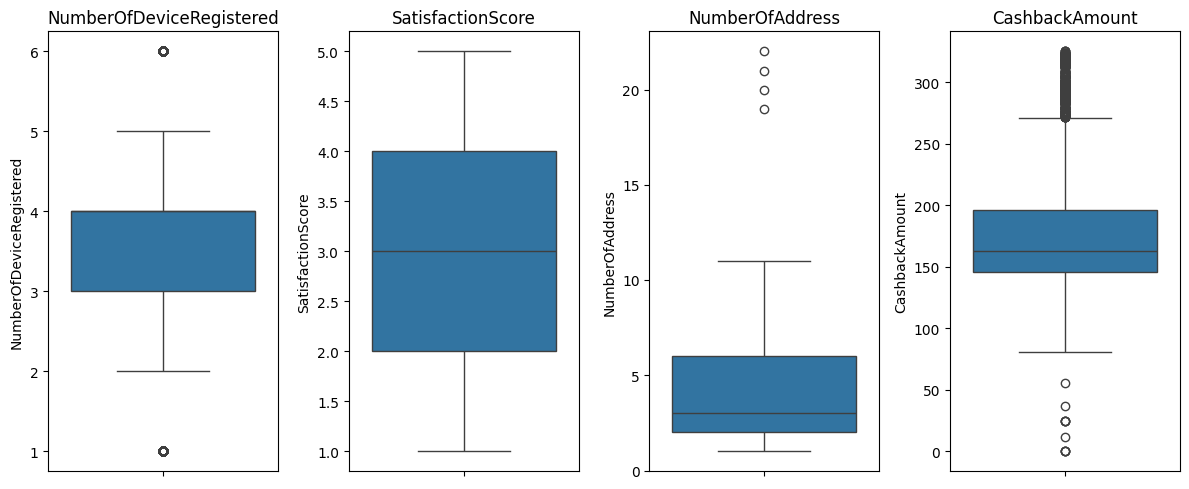

In [ ]:
# Boxplot cho các cột số
num_cols = ['NumberOfDeviceRegistered','SatisfactionScore',
    'NumberOfAddress', 'CashbackAmount']
plt.figure(figsize=(12,5))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
for _ in cols:
  print(df[_].value_counts().tail(10))
  print()

CityTier
1    3666
3    1722
2     242
Name: count, dtype: int64

NumberOfDeviceRegistered
4    2377
3    1699
5     881
2     276
1     235
6     162
Name: count, dtype: int64

SatisfactionScore
3    1698
1    1164
5    1108
4    1074
2     586
Name: count, dtype: int64

NumberOfAddress
1     371
8     280
7     256
9     239
10    194
11     98
19      1
21      1
20      1
22      1
Name: count, dtype: int64

Complain
0    4026
1    1604
Name: count, dtype: int64

CashbackAmount
246    2
305    2
306    2
255    2
253    2
311    2
12     1
56     1
37     1
81     1
Name: count, dtype: int64



- Cột *NumberOfAddress* có ngoại lai >=19: thay bằng giá trị ngưỡng trên (=11).
- Cột *CashbackAmount* không hẳn có ngoại lai thực sự, mà là một số giá trị ít xuất hiện nhưng vẫn hợp lý

In [ ]:
df.loc[df['NumberOfAddress'] > 11, 'NumberOfAddress'] = 11

In [ ]:
# # Dùng thống kê IQR để phát hiện ngoại lai
# Q1 = df['CashbackAmount'].quantile(0.25)
# Q3 = df['CashbackAmount'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# outliers = df[(df['CashbackAmount'] < lower_bound) | (df['CashbackAmount'] > upper_bound)]
# print("Số lượng ngoại lai:", len(outliers))


In [ ]:
# # Thay thế ngoại lai bằng giá trị giới hạn (capping/winsorizing)
# df['CashbackAmount'] = np.where(df['CashbackAmount'] < lower_bound, lower_bound,
#                 np.where(df['CashbackAmount'] > upper_bound, upper_bound, df['CashbackAmount']))

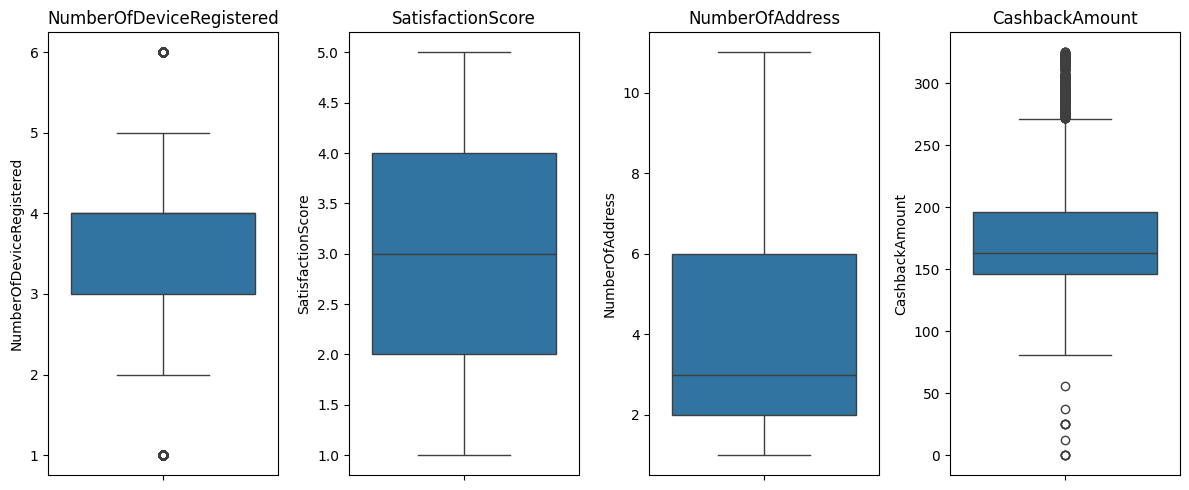

In [ ]:
# Boxplot cho các cột số
num_cols = ['NumberOfDeviceRegistered','SatisfactionScore',
    'NumberOfAddress', 'CashbackAmount']
plt.figure(figsize=(12, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# **5. Kiểm tra lại dữ liệu sau xử lý**

In [ ]:
# xem các dòng dữ liệu đầu
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,1,1,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,121
2,1,1,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120
3,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


In [ ]:
# Thông tin tổng quan sau xử lý
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Churn                        5630 non-null   int64 
 1   Tenure                       5630 non-null   int64 
 2   PreferredLoginDevice         5630 non-null   object
 3   CityTier                     5630 non-null   int64 
 4   WarehouseToHome              5630 non-null   int64 
 5   PreferredPaymentMode         5630 non-null   object
 6   Gender                       5630 non-null   object
 7   HourSpendOnApp               5630 non-null   int64 
 8   NumberOfDeviceRegistered     5630 non-null   int64 
 9   PreferedOrderCat             5630 non-null   object
 10  SatisfactionScore            5630 non-null   int64 
 11  MaritalStatus                5630 non-null   object
 12  NumberOfAddress              5630 non-null   int64 
 13  Complain                     5630

In [ ]:
# xem thống kê mô tả sau xử lý
df.describe(include='all')

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630,5630.000000,5630.000000,5630,5630,5630.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
unique,NaN,NaN,2,NaN,NaN,5,2,NaN,NaN,5,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3996,NaN,NaN,2314,3384,NaN,NaN,2080,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.168384,9.745115,NaN,1.654707,15.534636,NaN,NaN,2.934636,3.688988,NaN,3.066785,NaN,4.207282,0.284902,15.674600,1.892007,2.981350,4.441918,177.221492
std,0.374240,8.517726,NaN,0.915389,8.088873,NaN,NaN,0.705528,1.023999,NaN,1.380194,NaN,2.553082,0.451408,3.591058,2.180370,2.924132,3.493224,49.193869
min,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,8.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,15.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000


In [ ]:
# Kiểm tra số giá trị null
print(df.isnull().sum())

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


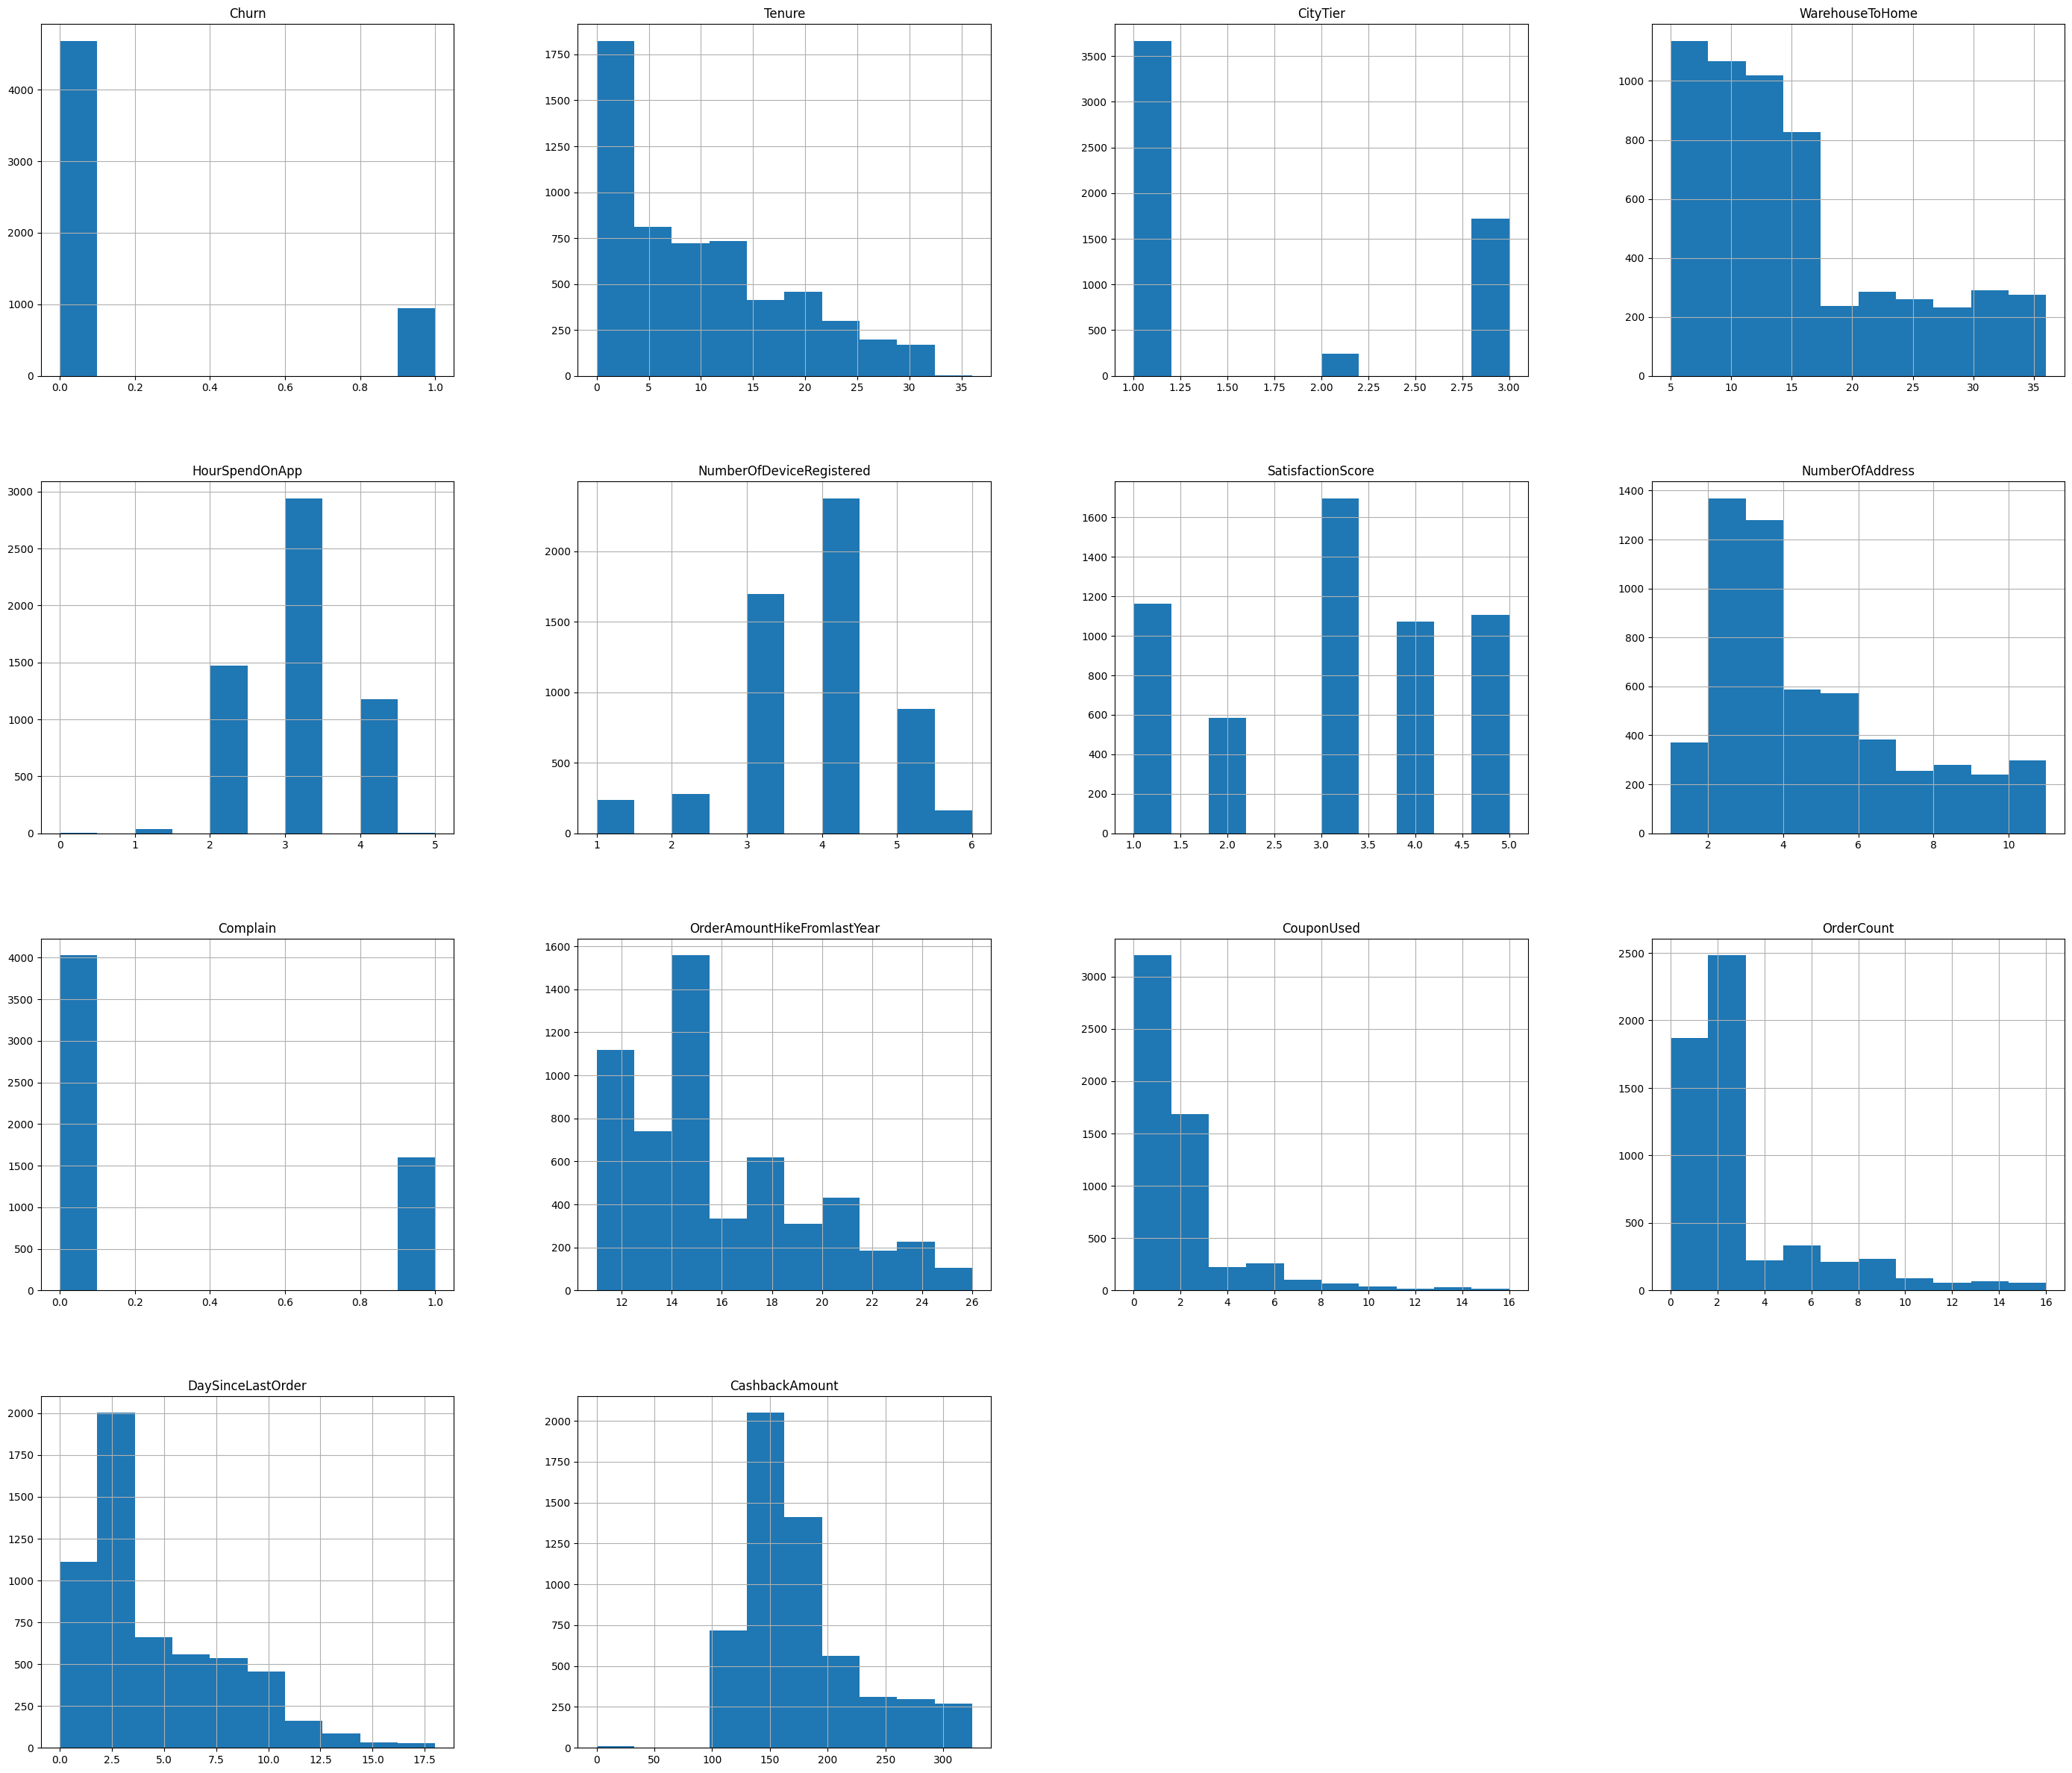

In [ ]:
# check phân bố dữ liệu
df.hist(figsize=(35, 30))
plt.show()

In [ ]:
# Lưu file sau tiền xử lý
df.to_csv("/content/drive/MyDrive/IE313_Project/1.Dataset/clean_data/ECommerce_Dataset_cleaned.csv", index=False)
print("Đã lưu dữ liệu sạch vào file 'ECommerce_Dataset_cleaned.csv'")

Đã lưu dữ liệu sạch vào file 'ECommerce_Dataset_cleaned.csv'


# **6. Tạo thêm đặc trưng**

- Số thiết bị trung bình đăng kí mỗi tháng = Tổng số thiết bị đã đăng ký / Thời gian gắn bó (tháng)
- Sử dụng .replace(0, 1) cho Tenure để tránh lỗi chia cho 0

In [ ]:
df['DevicePerTenure'] = df['NumberOfDeviceRegistered'] / df['Tenure'].replace(0, 1)

print(df[['Tenure', 'NumberOfDeviceRegistered', 'DevicePerTenure']].head())

   Tenure  NumberOfDeviceRegistered  DevicePerTenure
0       4                         3             0.75
1       1                         4             4.00
2       1                         4             4.00
3       0                         4             4.00
4       0                         3             3.00


In [ ]:
# - Số địa chỉ trung bình thêm mỗi tháng = Tổng số địa chỉ / Thời gian gắn bó (tháng)
# df['AddressPerTenure'] = df['NumberOfAddress'] / df['Tenure'].replace(0, 1)

# print(df[['Tenure', 'NumberOfAddress', 'AddressPerTenure']].head())

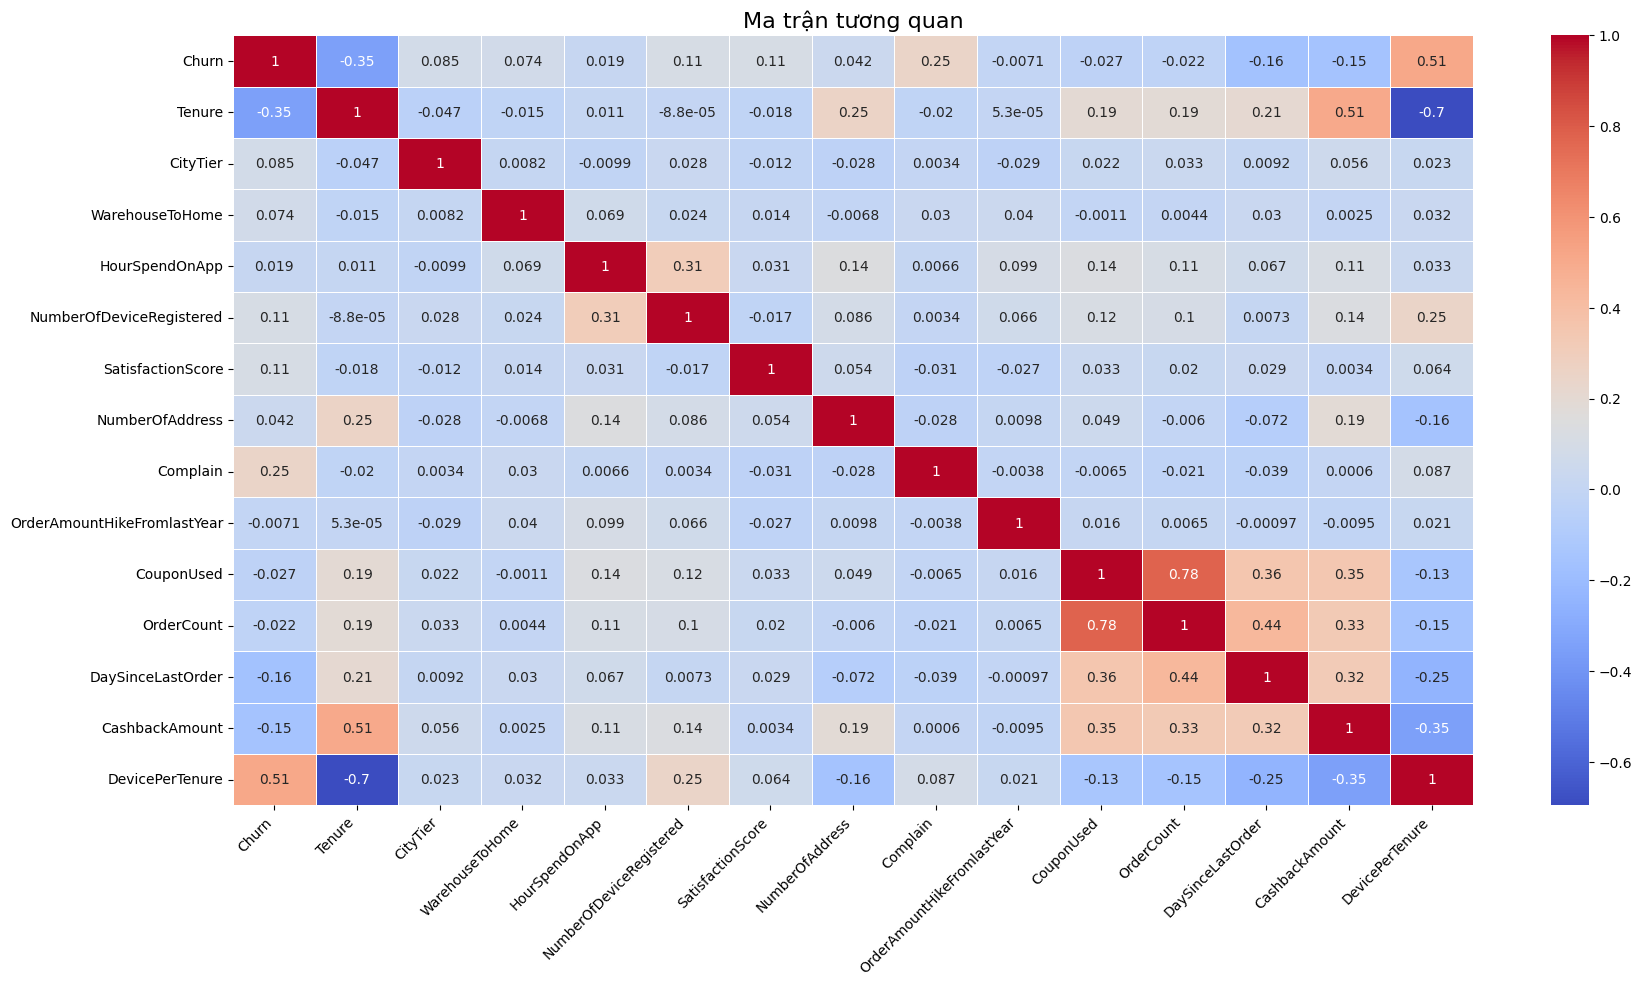

In [ ]:
correlation_matrix = df.select_dtypes(np.number).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [ ]:
import scipy.stats as ss

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
for col in cat_cols:
    table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, _ = ss.chi2_contingency(table)

    print(col, ": chi2 =", round(chi2,2), "; p-value =", round(p,5))

PreferredLoginDevice : chi2 = 14.4 ; p-value = 0.00015
PreferredPaymentMode : chi2 = 51.83 ; p-value = 0.0
Gender : chi2 = 4.66 ; p-value = 0.03082
PreferedOrderCat : chi2 = 288.6 ; p-value = 0.0
MaritalStatus : chi2 = 188.67 ; p-value = 0.0


- Kết quả kiểm định Chi-square cho thấy tất cả các biến định tính đều có mối liên hệ thống kê với biến Churn (p-value < 0.05). Trong đó, **PreferedOrderCat** và **MaritalStatus** có giá trị thống kê chi2 lớn, cho thấy sự khác biệt rõ rệt về hành vi rời bỏ giữa các nhóm trong từng biến.

In [ ]:
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(table)[0]
    n = table.sum().sum()
    r, c = table.shape
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

# Tính cho từng biến category
for col in cat_cols:
    print(col, round(cramers_v(df[col], df['Churn']), 3))

PreferredLoginDevice 0.051
PreferredPaymentMode 0.096
Gender 0.029
PreferedOrderCat 0.226
MaritalStatus 0.183


- Kết quả phân tích Cramér’s V cho thấy **PreferedOrderCat** và **MaritalStatus** có mức độ liên hệ trung bình với biến Churn.
- Ngược lại, **Gender**, **PreferredLoginDevice**, **PreferredPaymentMode** có mức độ liên hệ rất yếu, ảnh hưởng không đáng kể đến Churn.

Bỏ các cột không cần thiết:
- **OrderCount** (Do đa cộng tuyến cao với CouponUsed)
- **Tenure** (Do đa cộng tuyến cao với đặc trưng mới có hiệu quả hơn - DevicePerTenure)
- **Gender**, **PreferredLoginDevice**, **PreferredPaymentMode** (Do mức độ liên quan với Churn thấp)

In [ ]:
df_copy = df.copy()

In [ ]:
df.drop(columns=['OrderCount', 'Tenure', 'Gender', 'PreferredLoginDevice', 'PreferredPaymentMode'], inplace=True)

In [ ]:
df.head()

,Churn,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CashbackAmount,DevicePerTenure
0,1,3,6,3,3,Laptop & Accessory,2,Single,9,1,11,1,5,160,0.75
1,1,1,8,3,4,Mobile Phone,3,Single,7,1,15,0,0,121,4.00
2,1,1,30,2,4,Mobile Phone,3,Single,6,1,14,0,3,120,4.00
3,1,3,15,2,4,Laptop & Accessory,5,Single,8,0,23,0,3,134,4.00
4,1,1,12,3,3,Mobile Phone,5,Single,3,0,11,1,3,130,3.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   CityTier                     5630 non-null   int64  
 2   WarehouseToHome              5630 non-null   int64  
 3   HourSpendOnApp               5630 non-null   int64  
 4   NumberOfDeviceRegistered     5630 non-null   int64  
 5   PreferedOrderCat             5630 non-null   object 
 6   SatisfactionScore            5630 non-null   int64  
 7   MaritalStatus                5630 non-null   object 
 8   NumberOfAddress              5630 non-null   int64  
 9   Complain                     5630 non-null   int64  
 10  OrderAmountHikeFromlastYear  5630 non-null   int64  
 11  CouponUsed                   5630 non-null   int64  
 12  DaySinceLastOrder            5630 non-null   int64  
 13  CashbackAmount    

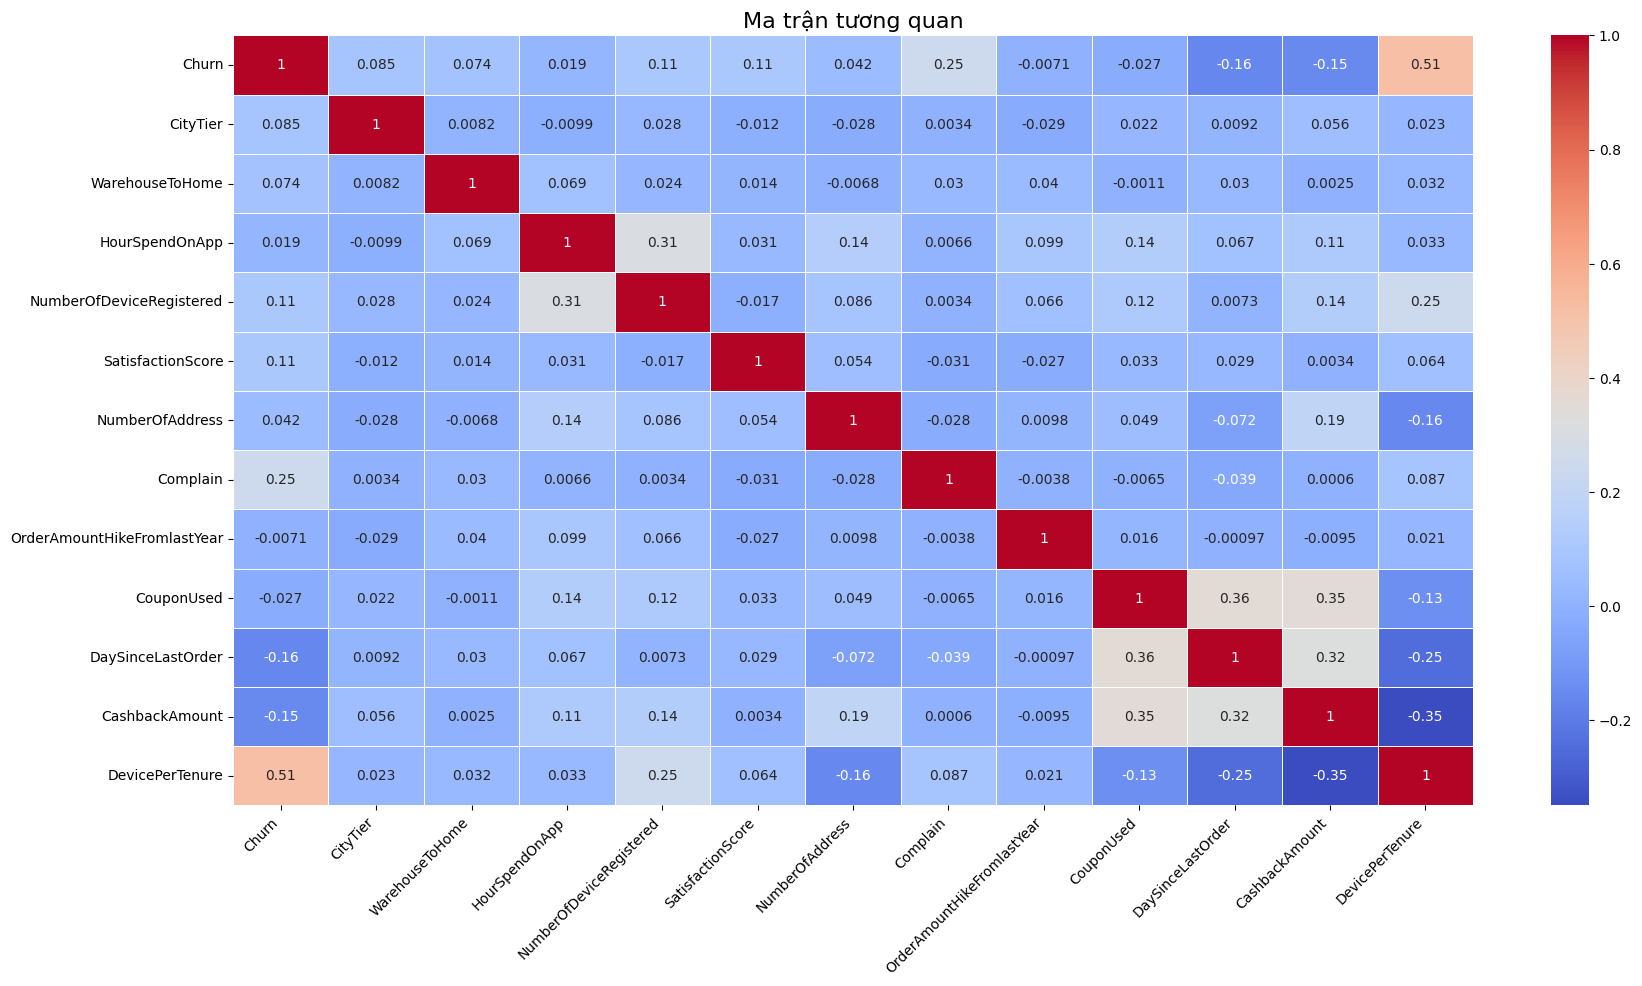

In [ ]:
correlation_matrix = df.select_dtypes(np.number).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# **7. Xuất file**

In [ ]:
# Lưu file sau tiền xử lý cho trực quan hóa
df_copy.to_csv("/content/drive/MyDrive/IE313_Project/1.Dataset/clean_data/ECommerce_Dataset_cleaned_visualization.csv", index=False)
print("Đã lưu dữ liệu sạch vào file 'ECommerce_Dataset_cleaned_visualization.csv'")

Đã lưu dữ liệu sạch vào file 'ECommerce_Dataset_cleaned_visualization.csv'


In [ ]:
# Lưu file sau tiền xử lý cho model
df.to_csv("/content/drive/MyDrive/IE313_Project/1.Dataset/clean_data/ECommerce_Dataset_cleaned_model.csv", index=False)
print("Đã lưu dữ liệu sạch vào file 'ECommerce_Dataset_cleaned_model.csv'")

Đã lưu dữ liệu sạch vào file 'ECommerce_Dataset_cleaned_model.csv'
